In [11]:
# Import Statements

import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Setting aesthetics for plots

sns.set_theme(style="ticks", palette = 'muted', font_scale = 1.3)
plt.rc("axes.spines", top=False, right=False)

In [13]:
df = pd.read_csv("C:/Users/serav/Documents/UBC/SUMMER 2021/TERM 2/DATA 301/project-group-30/data/raw/police_killings.csv", encoding = "ISO-8859-1")

In [14]:
df.describe()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,467.000000,467.0,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000,467.000000,465.000000,467.000000,465.000000,440.000000,465.000000,465.000000,465.000000
mean,15.830835,2015.0,36.403224,-96.972666,25.342612,91.584582,236936.614561,2.543443e+10,25434.197002,4783.719486,46627.182796,52527.331906,0.895913,2.497727,2.496774,0.117399,0.220217
std,8.658970,0.0,5.193357,16.953842,16.766458,110.185129,341262.721715,1.680140e+10,16801.379755,2374.565749,20511.194907,12948.263811,0.333584,1.393115,1.298412,0.069175,0.158347
min,1.000000,2015.0,19.915194,-159.642700,1.000000,1.000000,100.000000,1.003010e+09,1003.000000,0.000000,10290.000000,22545.000000,0.184049,1.000000,1.000000,0.011335,0.013547
25%,8.000000,2015.0,33.335240,-111.954636,8.000000,29.000000,5201.500000,8.022008e+09,8022.000000,3357.500000,32625.000000,43804.000000,0.645365,1.000000,1.000000,0.068592,0.106167
50%,16.000000,2015.0,35.769779,-94.761902,24.000000,63.000000,40200.000000,2.403380e+10,24033.000000,4447.000000,42759.000000,50856.000000,0.869612,2.000000,2.000000,0.105181,0.169544
75%,23.000000,2015.0,39.937452,-82.961582,40.000000,111.000000,378450.000000,4.011247e+10,40112.000000,5815.500000,56190.000000,56832.000000,1.081454,4.000000,3.000000,0.140833,0.284542
max,31.000000,2015.0,61.218408,-68.100007,56.000000,740.000000,980000.000000,5.600500e+10,56005.000000,26826.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.507614,0.828070


In [15]:
df.value_counts()

name                age  gender  raceethnicity    month     day  year  streetaddress                              city           state  latitude   longitude    state_fp  county_fp  tract_ce  geo_id       county_id  namelsad              lawenforcementagency                                                 cause    armed    pop   share_white  share_black  share_hispanic  p_income  h_income  county_income  comp_income  county_bucket  nat_bucket  pov   urate     college 
A'donte Washington  16   Male    Black            February  23   2015  Clearview Ln                               Millbrook      AL     32.529577  -86.362829   1         51         30902     1051030902   1051       Census Tract 309.02   Millbrook Police Department                                          Gunshot  No       3779  60.5         30.5         5.6             28375     51367.0   54766          0.937936     3.0            3.0         14.1  0.097686  0.168510    1
Mario Jordan        34   Male    Black            J

In [16]:
df.dtypes

name                     object
age                      object
gender                   object
raceethnicity            object
month                    object
day                       int64
year                      int64
streetaddress            object
city                     object
state                    object
latitude                float64
longitude               float64
state_fp                  int64
county_fp                 int64
tract_ce                  int64
geo_id                    int64
county_id                 int64
namelsad                 object
lawenforcementagency     object
cause                    object
armed                    object
pop                       int64
share_white              object
share_black              object
share_hispanic           object
p_income                 object
h_income                float64
county_income             int64
comp_income             float64
county_bucket           float64
nat_bucket              float64
pov     

In [17]:
# Remove 26 columns

df = df.drop(['name', 'day', 'year','h_income', 'state', 'cause', 'county_income', 'comp_income','county_bucket', 'nat_bucket', 'share_black', 'share_hispanic', 'college', 'streetaddress', 'pov', 'city', 'latitude', 'longitude', 'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad', 'lawenforcementagency'], axis =1)

In [18]:
# Remove rows with missing values

df = df.dropna()

In [19]:
# Remove rows that have 'age' == 'Unkown','armed' == 'Unkown', 'p_income' == '-', and 'month' == 'June'

indexNames_age = df[df['age'] == 'Unknown' ].index
df= df.drop(index=indexNames_age)

indexNames_armed = df[df['armed'] == 'Unknown' ].index
df= df.drop(index=indexNames_armed)

indexNames_armed = df[df['p_income'] == '-' ].index
df= df.drop(index=indexNames_armed)

indexNames_month = df[df['month'] == 'June' ].index
df= df.drop(index=indexNames_month)

In [20]:
# Change column name of 'p-income' and 'share_white'

df = df.rename(columns = {"p_income": "income"})
df = df.rename(columns = {"share_white": "share_Caucasian"})

In [21]:
# Replace values in 'raceethnicity'

df['raceethnicity'] = df['raceethnicity'].replace(['White'],'Caucasian')
df['raceethnicity'] = df['raceethnicity'].replace(['Black'],'African American')

In [22]:
# Change data type of 'age', 'p_income', and 'share_Caucasian' into numeric

df["age"] = df['age'].astype('int')
df["income"] = df['income'].astype('int')
df["share_Caucasian"] = df['share_Caucasian'].astype('float')

Text(0.35, 1.65, 'Boxplots for Finding Outliers in Numerical Columns')

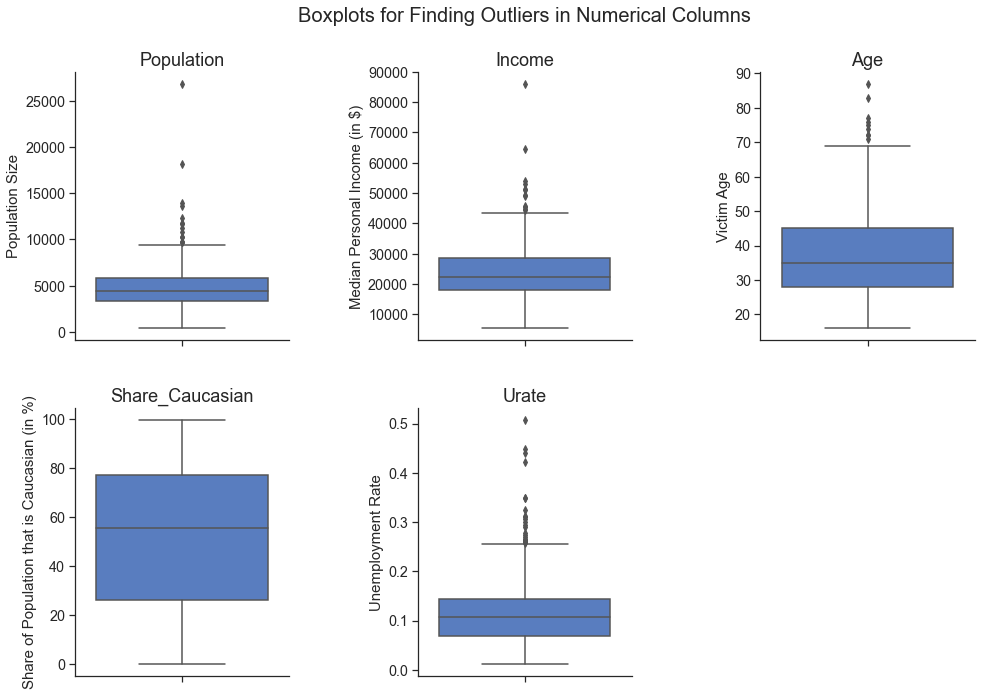

In [23]:
fig, ax = plt.subplots(2, 3, figsize = (25,6))

# Shows that the there are extreme outliers for population size > 15,000
sns.boxplot(y='pop', data=df, ax = ax[0,0])
ax[0,0].set_title('Population', size =18)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Population Size', fontsize = 15)

# The boxplot shows there are outliers, but I think it still makes sense to put them in considering this is an income column
sns.boxplot(y='income', data=df, ax = ax[0,1])
ax[0,1].set_title('Income', size =18)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('Median Personal Income (in $)', fontsize = 15)

# The boxplot shows there are outliers, but I think it still makes sense to put them in considering this is an age column
sns.boxplot(y='age', data=df, ax = ax[0,2])
ax[0,2].set_title('Age', size =18)
ax[0,2].set_xlabel('')
ax[0,2].set_ylabel('Victim Age', fontsize = 15)

# The boxplot shows that there are no outliers for share_Caucasian
sns.boxplot(y='share_Caucasian', data=df, ax = ax[1,0])
ax[1,0].set_title('Share_Caucasian', size =18)
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Share of Population that is Caucasian (in %)', fontsize = 15)

# The boxplot shows there are outliers, but I think it still makes sense to put them in considering this is an unemployment rate column
sns.boxplot(y='urate', data=df, ax = ax[1,1])
ax[1,1].set_title('Urate', size =18)
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('Unemployment Rate', fontsize = 15)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.6, 
                    top=1.5, 
                    wspace=0.6, 
                    hspace=0.25)
fig.delaxes(ax[1,2])
plt.suptitle('Boxplots for Finding Outliers in Numerical Columns', y=1.65, fontsize = 20, x= 0.35)

In [24]:
# Remove outliers in 'pop' based on boxplot

indexNames_armed = df[df['pop'] > 15000 ].index
df= df.drop(index=indexNames_armed)

In [25]:
# Categorize 'age'
age_labels = [f"{i} - {i+9}" for i in range(0,80,10)]
df['age_group'] = pd.cut(df['age'], range(0, 90, 10), right=False,labels=age_labels)

# Categorize 'population'
pop_labels = [f"{i} - {i+1000}" for i in range(0,27000,1000)]
df['pop_group'] = pd.cut(df['pop'], range(0, 28000, 1000), right=False, labels=pop_labels)

# Categorize 'income'
income_labels = [f"{i} - {i+1000}" for i in range(5000,87000,1000)]
df['income_bracket'] = pd.cut(df['income'], range(5000,88000,1000), right=False, labels=income_labels)

# Categorize 'share_Caucasian'
SC_labels = ['Low', 'Medium', 'Half', 'High', 'Very High']
df['SC_category'] = pd.qcut(x = df['share_Caucasian'], q= 5, precision = 1, labels=SC_labels)

In [26]:
# Reset index

df.reset_index(drop=True) 

,age,gender,raceethnicity,month,armed,pop,share_Caucasian,income,urate,age_group,pop_group,income_bracket,SC_category
0,16,Male,African American,February,No,3779,60.5,28375,0.097686,10 - 19,3000 - 4000,28000 - 29000,Half
1,27,Male,Caucasian,April,No,2769,53.8,14678,0.065724,20 - 29,2000 - 3000,14000 - 15000,Half
2,26,Male,Caucasian,March,No,4079,73.8,25286,0.166293,20 - 29,4000 - 5000,25000 - 26000,High
3,25,Male,Hispanic/Latino,March,Firearm,4343,1.2,17194,0.124827,20 - 29,4000 - 5000,17000 - 18000,Low
4,29,Male,Caucasian,March,No,6809,92.5,33954,0.063550,20 - 29,6000 - 7000,33000 - 34000,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,18,Male,African American,April,No,1640,40.9,25262,0.152047,10 - 19,1000 - 2000,25000 - 26000,Medium
447,28,Male,Native American,April,Firearm,4154,74.5,18470,0.133650,20 - 29,4000 - 5000,18000 - 19000,High
448,52,Male,Caucasian,March,Firearm,3850,83.2,21175,0.256150,50 - 59,3000 - 4000,21000 - 22000,Very High
449,38,Female,African American,February,Firearm,2544,21.7,26971,0.069601,30 - 39,2000 - 3000,26000 - 27000,Medium


In [28]:
# Method chain 1 (load and Clean data - remove columns and rows, rename columns, deal with missing data, and format data)

df1 = (
    pd.read_csv("C:/Users/serav/Documents/UBC/SUMMER 2021/TERM 2/DATA 301/project-group-30/data/raw/police_killings.csv", encoding = "ISO-8859-1")
    .drop(['name', 'day', 'year','h_income', 'cause', 'state', 'county_income', 'comp_income','county_bucket', 'nat_bucket', 'share_black', 'share_hispanic', 'college', 'streetaddress', 'pov', 'city', 'latitude', 'longitude', 'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad', 'lawenforcementagency'], axis =1)
    .rename(columns={"p_income": "income"})
    .rename(columns = {"share_white": "share_Caucasian"})
    .dropna()
    .query("age != 'Unknown' & armed != 'Unknown' & income != '-' & month != 'June'")  
)
df1['age'] = pd.to_numeric(df1['age'])
df1['income'] = pd.to_numeric(df1['income'])
df1['share_Caucasian'] = pd.to_numeric(df1['share_Caucasian'])

In [29]:
# Method chain 2 (Process Data - deal with outliers, create new columns, and replace values)

age_labels = [f"{i} - {i+9}" for i in range(0,80,10)]
pop_labels = [f"{i} - {i+1000}" for i in range(0,13000,1000)]
income_labels = [f"{i} - {i+1000}" for i in range(5000,87000,1000)]
SC_labels = ['Low', 'Medium', 'Half', 'High', 'Very High']
df2 =(
    df1
    .query("pop < 15000")
    .assign(age_group = lambda df: pd.cut(df['age'], range(0, 90, 10), right=False,labels=age_labels))
    .assign(pop_group = lambda df: pd.cut(df['pop'], range(0, 14000, 1000), right=False, labels=pop_labels))
    .assign(income_bracket = lambda df:pd.cut(df['income'], range(5000,88000,1000), right=False, labels=income_labels))
    .assign(SC_category = lambda df:pd.qcut(x = df['share_Caucasian'], q= 5, precision = 1, labels=SC_labels))
    .reset_index(drop=True) 
    .replace('White','Caucasian')
    .replace('Black','African American')
)
df2

,age,gender,raceethnicity,month,armed,pop,share_Caucasian,income,urate,age_group,pop_group,income_bracket,SC_category
0,16,Male,African American,February,No,3779,60.5,28375,0.097686,10 - 19,3000 - 4000,28000 - 29000,Half
1,27,Male,Caucasian,April,No,2769,53.8,14678,0.065724,20 - 29,2000 - 3000,14000 - 15000,Half
2,26,Male,Caucasian,March,No,4079,73.8,25286,0.166293,20 - 29,4000 - 5000,25000 - 26000,High
3,25,Male,Hispanic/Latino,March,Firearm,4343,1.2,17194,0.124827,20 - 29,4000 - 5000,17000 - 18000,Low
4,29,Male,Caucasian,March,No,6809,92.5,33954,0.063550,20 - 29,6000 - 7000,33000 - 34000,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,18,Male,African American,April,No,1640,40.9,25262,0.152047,10 - 19,1000 - 2000,25000 - 26000,Medium
447,28,Male,Native American,April,Firearm,4154,74.5,18470,0.133650,20 - 29,4000 - 5000,18000 - 19000,High
448,52,Male,Caucasian,March,Firearm,3850,83.2,21175,0.256150,50 - 59,3000 - 4000,21000 - 22000,Very High
449,38,Female,African American,February,Firearm,2544,21.7,26971,0.069601,30 - 39,2000 - 3000,26000 - 27000,Medium


In [30]:
# Load_and_process Function

def load_and_process(url_or_path_to_csv_file, encoding_input = "ISO-8859-1"):
    """
    Load and process a csv file.
    
    Load a csv file and process the data through method chains used to answer research questions.
    
    Parameters
    ----------
    url_or_path_to_csv_file : str
        URL or path to the csv file to load and process
    
    encoding_input : str, optional (default = "ISO-8859-1")
        the encoding for loading the data
        
    Returns
    -------
    dataFrame
        the cleaned dataFrame
    """
    
    # Method chain 1 (load and Clean data - remove columns and rows, rename columns, deal with missing data, and format data)

    df1 = (
        pd.read_csv(url_or_path_to_csv_file, encoding = encoding_input)
        .drop(['name', 'day', 'year','h_income', 'cause', 'state', 'county_income', 'comp_income','county_bucket', 'nat_bucket', 'share_black', 'share_hispanic', 'college', 'streetaddress', 'pov', 'city', 'latitude', 'longitude', 'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad', 'lawenforcementagency'], axis =1)
        .rename(columns={"p_income": "income"})
        .rename(columns = {"share_white": "share_Caucasian"})
        .dropna()
        .query("age != 'Unknown' & armed != 'Unknown' & income != '-' & month != 'June'")
    )
    df1['age'] = pd.to_numeric(df1['age'])
    df1['income'] = pd.to_numeric(df1['income'])
    df1['share_Caucasian'] = pd.to_numeric(df1['share_Caucasian'])
    
    # Method chain 2 (Process Data - deal with outliers, create new columns, and replace values)

    age_labels = [f"{i} - {i+9}" for i in range(0,80,10)]
    pop_labels = [f"{i} - {i+1000}" for i in range(0,13000,1000)]
    income_labels = [f"{i} - {i+1000}" for i in range(5000,87000,1000)]
    SC_labels = ['Low', 'Medium', 'Half', 'High', 'Very High']
    df2 =(
        df1
        .query("pop < 15000")
        .assign(age_group = lambda df: pd.cut(df['age'], range(0, 90, 10), right=False,labels=age_labels))
        .assign(pop_group = lambda df: pd.cut(df['pop'], range(0, 14000, 1000), right=False, labels=pop_labels))
        .assign(income_bracket = lambda df:pd.cut(df['income'], range(5000,88000,1000), right=False, labels=income_labels))
        .assign(SC_category = lambda df:pd.qcut(x = df['share_Caucasian'], q= 5, precision = 1, labels=SC_labels))
        .reset_index(drop=True) 
        .replace('White','Caucasian')
        .replace('Black','African American')
    )
    return df2

In [31]:
df = load_and_process("C:/Users/serav/Documents/UBC/SUMMER 2021/TERM 2/DATA 301/project-group-30/data/raw/police_killings.csv")
df

,age,gender,raceethnicity,month,armed,pop,share_Caucasian,income,urate,age_group,pop_group,income_bracket,SC_category
0,16,Male,African American,February,No,3779,60.5,28375,0.097686,10 - 19,3000 - 4000,28000 - 29000,Half
1,27,Male,Caucasian,April,No,2769,53.8,14678,0.065724,20 - 29,2000 - 3000,14000 - 15000,Half
2,26,Male,Caucasian,March,No,4079,73.8,25286,0.166293,20 - 29,4000 - 5000,25000 - 26000,High
3,25,Male,Hispanic/Latino,March,Firearm,4343,1.2,17194,0.124827,20 - 29,4000 - 5000,17000 - 18000,Low
4,29,Male,Caucasian,March,No,6809,92.5,33954,0.063550,20 - 29,6000 - 7000,33000 - 34000,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,18,Male,African American,April,No,1640,40.9,25262,0.152047,10 - 19,1000 - 2000,25000 - 26000,Medium
447,28,Male,Native American,April,Firearm,4154,74.5,18470,0.133650,20 - 29,4000 - 5000,18000 - 19000,High
448,52,Male,Caucasian,March,Firearm,3850,83.2,21175,0.256150,50 - 59,3000 - 4000,21000 - 22000,Very High
449,38,Female,African American,February,Firearm,2544,21.7,26971,0.069601,30 - 39,2000 - 3000,26000 - 27000,Medium


In [10]:
df.to_csv("../../../data/processed/data_processed.csv", index= False) 